## Replication for "Asymmetry by Design", March 22, 2020
### By Adam Goldstein and Charlie Eaton

### Appendix Figure A3: Coefficients for longitudinal fixed effects regression of 2 or more multi-brand strategy on ownership forms

In [1]:
%set graph_format svg

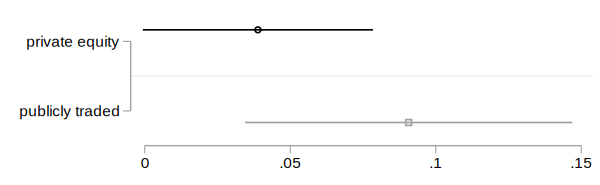

In [2]:
quietly use "/Users/Charlie/Dropbox/Asymmetry by Design/Data/asymmetry_20191229.dta", clear

quietly replace alt2multi_brands_all=alt2multi_brands_all2

quietly collapse (first) alt2multi_brands_all pe_ind public system_under, by(systemid year)
quietly est clear

quietly label var pe_ind "private equity"
quietly label var public "publicly traded"

quietly reghdfe alt2multi_brands_all pe_ind system_under, absorb(systemid year) vce(robust)
estimates sto pe_ind

quietly reghdfe alt2multi_brands_all public system_under, absorb(systemid year) vce(robust)
quietly estimates sto public

coefplot pe_ind public, drop(_cons) keep(pe_ind public) xlab(,nogrid) ylab(,nogrid) ///
scale(3) xsize(6.5) ysize(2) legend(off) scheme(plotplainblind)

quietly graph export "/Users/Charlie/Dropbox/Asymmetry by Design/Figures/af3_multibrandonpepublic.pdf", replace